<a href="https://colab.research.google.com/github/ssenichev/cs102new/blob/homework06/homework06/Py_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
pip install seaborn notebook

In [60]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [8]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/music_genre.csv')
df = df.sample(n=20000)
df = df.drop_duplicates()
df_ef = df.loc[df['artist_name'] == 'empty_field']
print(len(df_ef))
df_ef.head()

980


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
2543,29636.0,empty_field,History (Love Mix),28.0,0.012800,0.600,-1.0,0.5720,0.348000,C,0.144,-7.470,Major,0.0350,113.969,4-Apr,0.3200,Electronic
42281,71292.0,empty_field,Billy the Kid: III. Mexican Dance & Finale,0.0,0.940000,0.270,427093.0,0.0406,0.835000,C,0.325,-20.359,Major,0.0385,142.108,3-Apr,0.0604,Classical
29766,89521.0,empty_field,Work Out,65.0,0.492000,0.678,243180.0,0.6590,0.000000,C#,0.106,-4.694,Major,0.3120,?,4-Apr,0.6750,Rap
13827,61116.0,empty_field,Speak No Evil - Remastered 1998 / Rudy Van Gel...,37.0,0.613000,0.460,503787.0,0.6330,0.000000,F,0.274,-7.153,Minor,0.0404,106.331,3-Apr,0.5150,Jazz
35619,68525.0,empty_field,Someday,66.0,0.000616,0.455,207467.0,0.8580,0.000247,B,0.226,-5.659,Minor,0.0391,163.118,4-Apr,0.5970,Rock


In [9]:
df = df.drop(df[df['artist_name'] == 'empty_field'].index)
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
22767,42638.0,38 Special,Hold On Loosely,60.0,0.00762,0.546,279893.0,0.721,0.000094,A,0.0821,-5.470,Major,0.0300,127.22200000000001,4-Apr,0.826,Country
43370,77496.0,Zakir Hussain,Babar - Feat. Detroit Symphony Orchestra,28.0,0.95800,0.579,370947.0,0.472,0.885000,A,0.1040,-15.192,Major,0.0541,101.96799999999999,3-Apr,0.308,Classical
25515,27181.0,TK Kravitz,Property (feat. Keke Palmer),55.0,0.20200,0.555,193004.0,0.336,0.000000,F,0.1120,-14.668,Minor,0.4020,76.153,4-Apr,0.381,Rap
48252,86152.0,Waka Flocka Flame,No Hands (feat. Roscoe Dash and Wale),73.0,0.00544,0.760,263773.0,0.595,0.000000,C#,0.2410,-6.366,Major,0.0391,131.497,4-Apr,0.361,Hip-Hop
39553,48012.0,Grateful Dead,Touch of Grey - 2013 Remaster,49.0,0.07850,0.612,350862.0,0.696,0.000009,B,0.1400,-11.340,Major,0.0353,159.829,4-Apr,0.849,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,41240.0,Yoshida Brothers,Sistina,10.0,0.66400,0.735,321493.0,0.733,0.979000,G,0.0997,-6.473,Minor,0.0356,144.64,3-Apr,0.386,Anime
20542,28617.0,Confederate Railroad,She Never Cried - Remastered Version,40.0,0.29000,0.760,204533.0,0.627,0.000000,D,0.0652,-9.048,Major,0.0351,?,4-Apr,0.731,Country
10367,27428.0,Diana Krall,You Go To My Head,34.0,0.86700,0.274,405520.0,0.121,0.000251,G,0.0856,-16.588,Major,0.0332,99.48700000000001,4-Apr,0.189,Jazz
2436,72274.0,Jamiroquai,Superfresh,50.0,0.03360,0.749,228027.0,0.797,0.002790,F,0.2000,-8.143,Minor,0.0373,?,4-Apr,0.702,Electronic


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [11]:
# 1
genres = list(df['music_genre'].unique())
genres.pop()
count = []
percentage = []
for genre in genres:
  count.append(len(df[df['music_genre'] == genre]))
  percentage.append((len(df[df['music_genre'] == genre]) / len(df)) * 100)

df_dict = pd.DataFrame({"genre": genres, "amount": count, "percantage": percentage})
df_dict


,genre,amount,percantage
0,Country,1917,10.079924
1,Classical,1860,9.780208
2,Rap,1900,9.990535
3,Hip-Hop,1873,9.848565
4,Rock,1918,10.085182
5,Blues,1912,10.053633
6,Jazz,1861,9.785466
7,Anime,1958,10.295510
8,Alternative,1942,10.211379
9,Electronic,1876,9.864339


<Axes: xlabel='amount', ylabel='genre'>

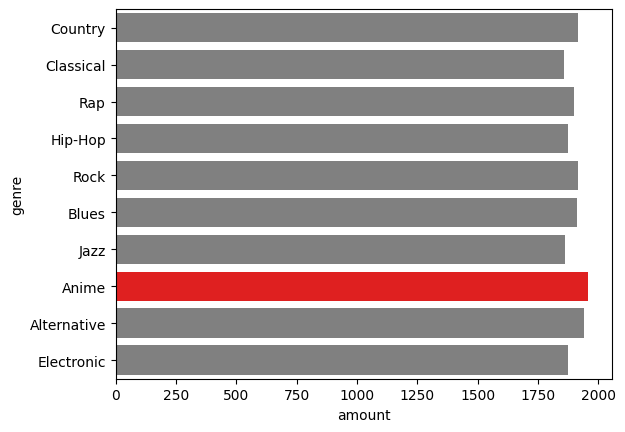

In [12]:
# 2
clrs = ['grey' if (x < max(df_dict['amount'].values.tolist())) else 'red' for x in df_dict['amount'].values.tolist()]
sns.barplot(x=df_dict['amount'], y=df_dict['genre'], palette=clrs, orient='h')

In [13]:
# 3
d = pd.DataFrame(columns=['genre', 'tempo'])
for genre in genres:
  temp = df[df['music_genre'] == genre]
  d.loc[len(d)] = [genre, temp['danceability'].mean()]
  
d.loc[d['tempo'].idxmax()]

genre     Hip-Hop
tempo    0.714501
Name: 3, dtype: object

In [14]:
# 4
minmaj = pd.DataFrame(columns=['genre', 'minor', 'major', 'max_am'])
for genre in genres:
  temp = df[df['music_genre'] == genre]
  min = len(temp[temp['mode'] == 'Minor'])
  maj = len(temp[temp['mode'] == 'Major'])
  minmaj.loc[len(minmaj)] = [genre, min, maj, 'minor' if min >= maj else 'major']
  
minmaj

,genre,minor,major,max_am
0,Country,227,1690,major
1,Classical,607,1253,major
2,Rap,824,1076,major
3,Hip-Hop,816,1057,major
4,Rock,487,1431,major
5,Blues,556,1356,major
6,Jazz,888,973,major
7,Anime,764,1194,major
8,Alternative,673,1269,major
9,Electronic,866,1010,major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [16]:
df['artist_name'].value_counts().idxmax(), df['artist_name'].value_counts().idxmin()

('Nobuo Uematsu', 'The Future Sound Of London')

<Axes: >

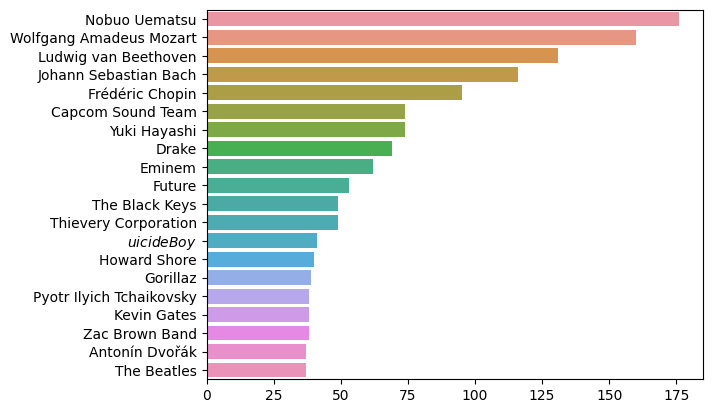

In [33]:
top20 = df['artist_name'].value_counts().nlargest(20)
sns.barplot(x=top20.values, y=top20.index, orient='h')

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [ ]:
# PUT YOUR CODE HERE

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

<Axes: xlabel='Popularity', ylabel='Genres'>

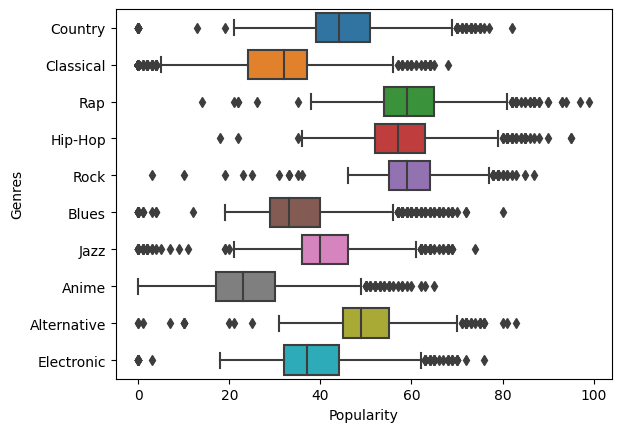

In [38]:
df5 = pd.DataFrame().assign(Genres=df['music_genre'], Popularity=df['popularity'])
sns.boxplot(y=df5["Genres"], x=df5["Popularity"])

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

([<matplotlib.patches.Wedge at 0x7f9841b33400>,
 [Text(-0.7694807363297501, 0.7860657710506328, 'Nobuo Uematsu'),
  Text(0.5318464762016472, -0.9628807432656917, 'The Beatles'),
  Text(1.0601211224342326, -0.2935016282216893, 'Five Finger Death Punch')])

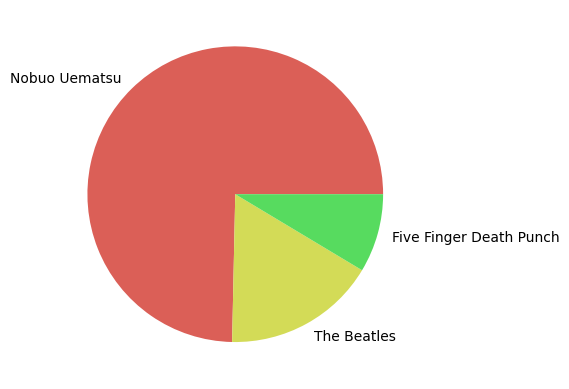

In [58]:
top3_genres = df['music_genre'].value_counts().nlargest(3).index
list_true_false = [entry in top3_genres for entry in df["music_genre"]]
genres_artists = (
    df[["artist_name", "music_genre"]]
    .loc[list_true_false]
    .value_counts(sort=True)
    .reset_index()
    .drop_duplicates(subset=["music_genre"])
)
val = genres_artists[0].tolist()
art_name = genres_artists["artist_name"].tolist()
genre_name = genres_artists["music_genre"].tolist()

plt.pie(val, labels=art_name, colors=sns.color_palette("hls"))

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

In [ ]:
# PUT YOUR CODE HERE

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [61]:
val_ = df["duration_ms"] * 0.001 / 60
conditions = [val_ <= 3, val_ > 5]
values = ["короткая", "длинная"]
df["track_length"] = np.select(conditions, values)
df["track_length"] = df["track_length"].replace("0", "средняя")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,track_length
22767,42638.0,38 Special,Hold On Loosely,60.0,0.00762,0.546,279893.0,0.721,0.000094,A,0.0821,-5.470,Major,0.0300,127.22200000000001,4-Apr,0.826,Country,средняя
43370,77496.0,Zakir Hussain,Babar - Feat. Detroit Symphony Orchestra,28.0,0.95800,0.579,370947.0,0.472,0.885000,A,0.1040,-15.192,Major,0.0541,101.96799999999999,3-Apr,0.308,Classical,длинная
25515,27181.0,TK Kravitz,Property (feat. Keke Palmer),55.0,0.20200,0.555,193004.0,0.336,0.000000,F,0.1120,-14.668,Minor,0.4020,76.153,4-Apr,0.381,Rap,средняя
48252,86152.0,Waka Flocka Flame,No Hands (feat. Roscoe Dash and Wale),73.0,0.00544,0.760,263773.0,0.595,0.000000,C#,0.2410,-6.366,Major,0.0391,131.497,4-Apr,0.361,Hip-Hop,средняя
39553,48012.0,Grateful Dead,Touch of Grey - 2013 Remaster,49.0,0.07850,0.612,350862.0,0.696,0.000009,B,0.1400,-11.340,Major,0.0353,159.829,4-Apr,0.849,Rock,длинная


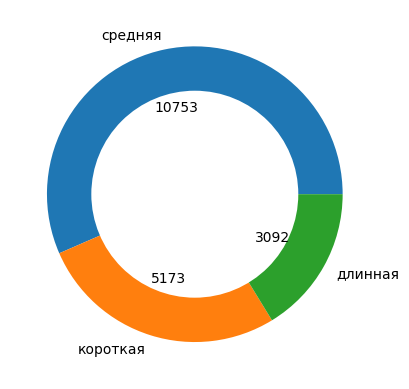

In [62]:
track_len_labels = df["track_length"].value_counts().reset_index()["index"].tolist()
total = sum(df["track_length"].value_counts())
plt.pie(df["track_length"].value_counts(), labels=track_len_labels, autopct=lambda p: "{:.0f}".format(p * total / 100))
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]